## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as numpy

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

data_df = data_df.reset_index(drop=True)

# Display the data table for preview
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

mice = len(data_df['Mouse ID'].unique())
print(mice)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice = data_df[data_df.duplicated(['Mouse ID','Timepoint'])]

print((dup_mice['Mouse ID']).to_string(index= False))


 g989
 g989
 g989
 g989
 g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


data_df.drop_duplicates(['Mouse ID', 'Timepoint'], inplace= True)

clean_data_df = pd.DataFrame(data_df, columns= ['Mouse ID','Drug Regimen','Sex','Age_months',
                                                'Weight (g)','Timepoint','Tumor Volume (mm3)',
                                               'Metastatic Sites'])
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(clean_data_df['Mouse ID'].unique())
print(total_mice)

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#create grouby object that groups by drug regimen
clean_data_drug = pd.DataFrame
data_drug_grouped = clean_data_df.groupby(['Drug Regimen'])

#mean
mean = data_drug_grouped['Tumor Volume (mm3)'].mean()

#median
median = data_drug_grouped['Tumor Volume (mm3)'].median()

#variance
variance = data_drug_grouped['Tumor Volume (mm3)'].var()

#standard deviation
std = data_drug_grouped['Tumor Volume (mm3)'].std()

#SEM
sem = data_drug_grouped['Tumor Volume (mm3)'].sem()

#create summary dataframe
sum_stats_df = pd.DataFrame({'Mean': mean,
                            'Median': median,
                            'Variance': variance,
                            'Standard Deviation': std,
                            'SEM': sem})
sum_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

sum_stats2 = clean_data_df.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']

print(sum_stats2)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

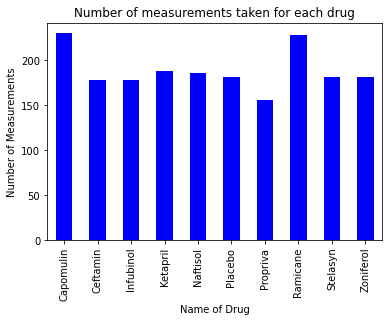

In [57]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.


bar1_df = pd.DataFrame(data_drug_grouped.count())

bar_chart1 = bar1_df.plot(kind='bar',color='blue')

plt.legend().remove()
plt.title('Number of measurements taken for each drug')
plt.xlabel('Name of Drug')
plt.ylabel('Number of Measurements')

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



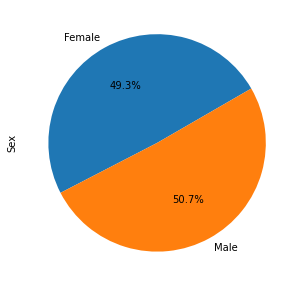

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = clean_data_df.groupby(['Sex']).count()['Mouse ID']

gender_summary_df = pd.DataFrame({'Sex': gender})

pie_chart1 = gender_summary_df.plot.pie(y='Sex',autopct='%1.1f%%', startangle=30, figsize=(5,5))

plt.legend().remove()

(-1.134710643854841,
 1.1108873955105962,
 -1.1104525981109319,
 1.1354391405481354)

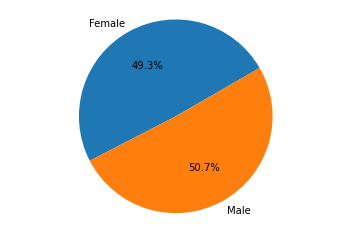

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mf_label = ['Female', 'Male']

plt.pie(gender, labels= mf_label,
        autopct="%1.1f%%", startangle=30)


# Create axes which are equal so we have a perfect circle
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [14]:
#Capomulin

# only include capomulin data
drug1_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin",:]

# group by mouse ID and get final times
drug1_final_time = drug1_df.groupby('Mouse ID').max()['Timepoint']

# create dataframe
drug1_vol = pd.DataFrame(drug1_final_time)

# merge dataframe with the cleaned dataframe
capomulin_data = pd.merge(drug1_vol, clean_data_df, on=("Mouse ID","Timepoint"),how="left")

capomulin_data.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [15]:
# Select Tumor Volume.  (This is the data that will be plotted and used for IQR)
cap_tumor_vol = capomulin_data["Tumor Volume (mm3)"]

# Capomulin IQR
quartiles = cap_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [16]:
# Ramicane

# only include ramicane data
drug2_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Ramicane",:]

# group by mouse ID and get final times
drug2_final_time = drug2_df.groupby('Mouse ID').max()['Timepoint']

# create dataframe
drug2_vol = pd.DataFrame(drug2_final_time)

# merge dataframe with the cleaned dataframe
ramicane_data = pd.merge(drug2_vol, clean_data_df, on=("Mouse ID","Timepoint"),how="left")

ramicane_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [17]:
# Select Tumor Volume.  (This is the data that will be plotted and used for IQR)
ram_tumor_vol = ramicane_data["Tumor Volume (mm3)"]

# Ramicane IQR
quartiles = ram_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [18]:
# Infubinol

# only include infubinol data
drug3_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Infubinol",:]

# group by mouse ID and get final times
drug3_final_time = drug3_df.groupby('Mouse ID').max()['Timepoint']

# create dataframe
drug3_vol = pd.DataFrame(drug3_final_time)

# merge dataframe with the cleaned dataframe
infubinol_data = pd.merge(drug3_vol, clean_data_df, on=("Mouse ID","Timepoint"),how="left")

infubinol_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [19]:
# Select Tumor Volume.  (This is the data that will be plotted and used for IQR)
inf_tumor_vol = infubinol_data["Tumor Volume (mm3)"]

# Ramicane IQR
quartiles = inf_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [20]:
# Ceftamin

# only include ceftamin data
drug4_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Ceftamin",:]

# group by mouse ID and get final times
drug4_final_time = drug4_df.groupby('Mouse ID').max()['Timepoint']

# create dataframe
drug4_vol = pd.DataFrame(drug4_final_time)

# merge dataframe with the cleaned dataframe
ceftamin_data = pd.merge(drug4_vol, clean_data_df, on=("Mouse ID","Timepoint"),how="left")

ceftamin_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [21]:
# Select Tumor Volume.  (This is the data that will be plotted and used for IQR)
cef_tumor_vol = ceftamin_data["Tumor Volume (mm3)"]

# Ramicane IQR
quartiles = cef_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x2716cd93e20>,
 'caps': [<matplotlib.lines.Line2D at 0x2716cda3520>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2716cd93ac0>,
 'medians': [<matplotlib.lines.Line2D at 0x2716cda3be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2716cda3f40>,
 'means': []}

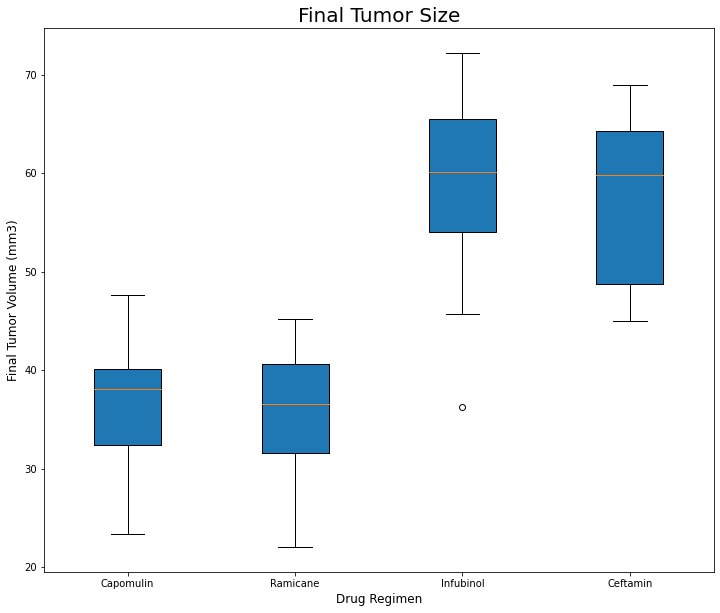

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_tumor_vol = [cap_tumor_vol, ram_tumor_vol, inf_tumor_vol, cef_tumor_vol]
label2 = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


fig1,ax1 = plt.subplots(figsize = (12, 10))
ax1.set_title('Final Tumor Size',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 12)
ax1.boxplot(final_tumor_vol, labels=label2, widths=0.4, patch_artist=True, vert=True)

## Line and Scatter Plots

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

b128_data = clean_data_df.loc[clean_data_df["Mouse ID"] == "b128",:]
b128_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


Text(0, 0.5, 'Tumor Volume (mm3)')

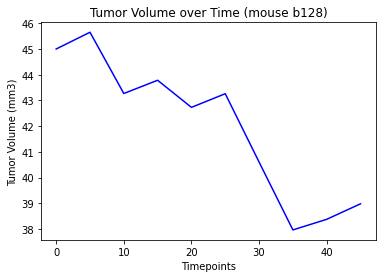

In [24]:
# get timepiont
b128_time = b128_data['Timepoint'].values

# get volume
b128_vol = b128_data['Tumor Volume (mm3)'].values

# line plot
b128_scatter, = plt.plot(b128_time, b128_vol, color = 'blue')

# label chart
plt.title('Tumor Volume over Time (mouse b128)')
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')

Text(0.5, 0, 'Weight (g)')

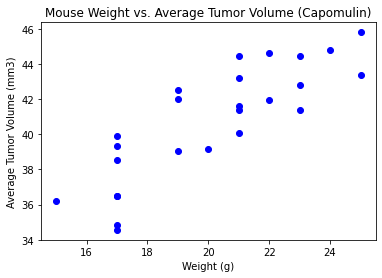

In [43]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# average tumor volume
avg_vol = drug1_df.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']

# mouse weight
cap_wt = drug1_df.groupby(['Mouse ID']).mean()['Weight (g)']

# scatter plot
plt.scatter(cap_wt,avg_vol, marker='o', facecolors='blue', edgecolors='blue')

# label plot
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

## Correlation and Regression

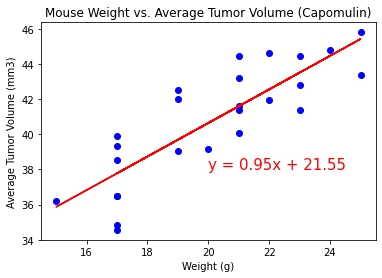

The correlation coeffecient is: 0.7088568047708717


In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Add the linear regression equation and line to plot
y_values = avg_vol
x_values = cap_wt
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap_wt,avg_vol, marker='o', facecolors='blue', edgecolors='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

plt.show()

print(f'The correlation coeffecient is: {rvalue**2}')